In [23]:
import pandas as pd
df=pd.read_csv('hayvansal.csv')
df = df.drop(columns=['Unnamed: 0'])

df

,Year,Value,avg_temp,water_metric,Product Group
0,1961,1891800.00,11.181358,8.819635,Livestock and Animal Products
1,1962,1916000.00,9.536632,8.308219,Livestock and Animal Products
2,1963,1880400.00,8.908176,8.792237,Livestock and Animal Products
3,1964,1887672.00,10.170688,8.145492,Livestock and Animal Products
4,1965,1918000.00,9.422461,12.989726,Livestock and Animal Products
...,...,...,...,...,...
7423,2017,10212.38,11.616636,10.160959,Livestock and Animal Products
7424,2018,10559.66,12.562935,8.404110,Livestock and Animal Products
7425,2019,10980.97,11.908582,10.184932,Livestock and Animal Products
7426,2020,10476.92,12.367193,9.245219,Livestock and Animal Products


In [24]:
#production_values = df.groupby('Year')['Value'].mean()
#production_df = pd.DataFrame({'Year': production_values.index, 'production_values': production_values.values})
#df = df.merge(production_df, on='Year', how='left')
grouped = df.groupby(['Year'])['Value'].mean().reset_index()
grouped['Scaled_Value'] = grouped['Value'].apply(lambda x: float('{:.0f}'.format(x)))/200000

grouped['Temperature']=df['avg_temp']
grouped


,Year,Value,Scaled_Value,Temperature
0,1961,1.837819e+06,9.189095,11.181358
1,1962,1.777471e+06,8.887355,9.536632
2,1963,1.756565e+06,8.782825,8.908176
3,1964,1.741647e+06,8.708235,10.170688
4,1965,1.769522e+06,8.847610,9.422461
...,...,...,...,...
57,2018,2.076401e+06,10.382005,12.562935
58,2019,2.146846e+06,10.734230,11.908582
59,2020,2.225063e+06,11.125315,12.367193
60,2021,2.306537e+06,11.532685,10.741261


In [25]:
grouped['Precipitation']=df['water_metric']
grouped

,Year,Value,Scaled_Value,Temperature,Precipitation
0,1961,1.837819e+06,9.189095,11.181358,8.819635
1,1962,1.777471e+06,8.887355,9.536632,8.308219
2,1963,1.756565e+06,8.782825,8.908176,8.792237
3,1964,1.741647e+06,8.708235,10.170688,8.145492
4,1965,1.769522e+06,8.847610,9.422461,12.989726
...,...,...,...,...,...
57,2018,2.076401e+06,10.382005,12.562935,8.404110
58,2019,2.146846e+06,10.734230,11.908582,10.184932
59,2020,2.225063e+06,11.125315,12.367193,9.245219
60,2021,2.306537e+06,11.532685,10.741261,11.702055


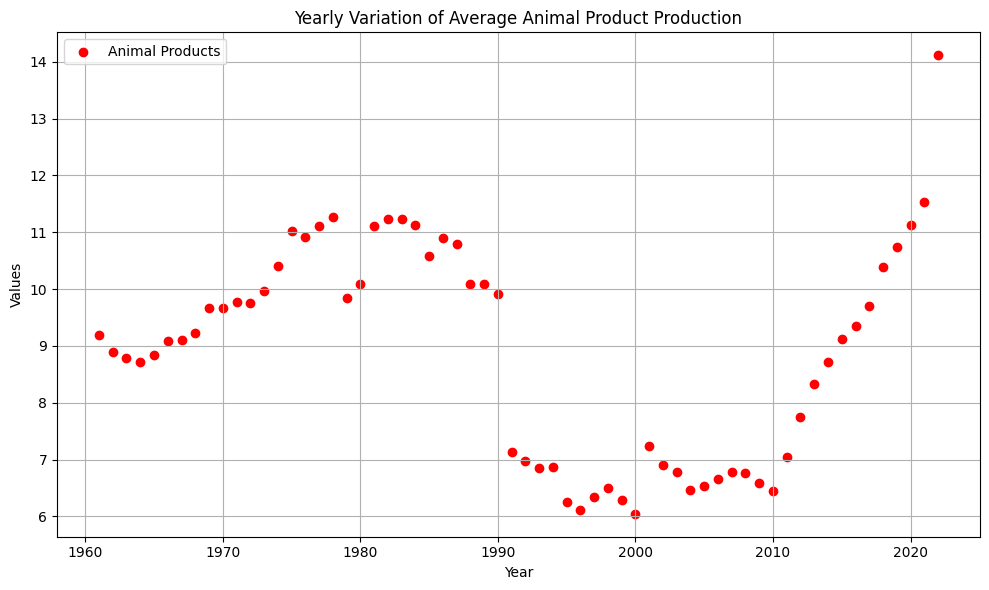

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped['Year'], grouped['Scaled_Value'], color='red', label='Animal Products')

plt.title('Yearly Variation of Average Animal Product Production')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


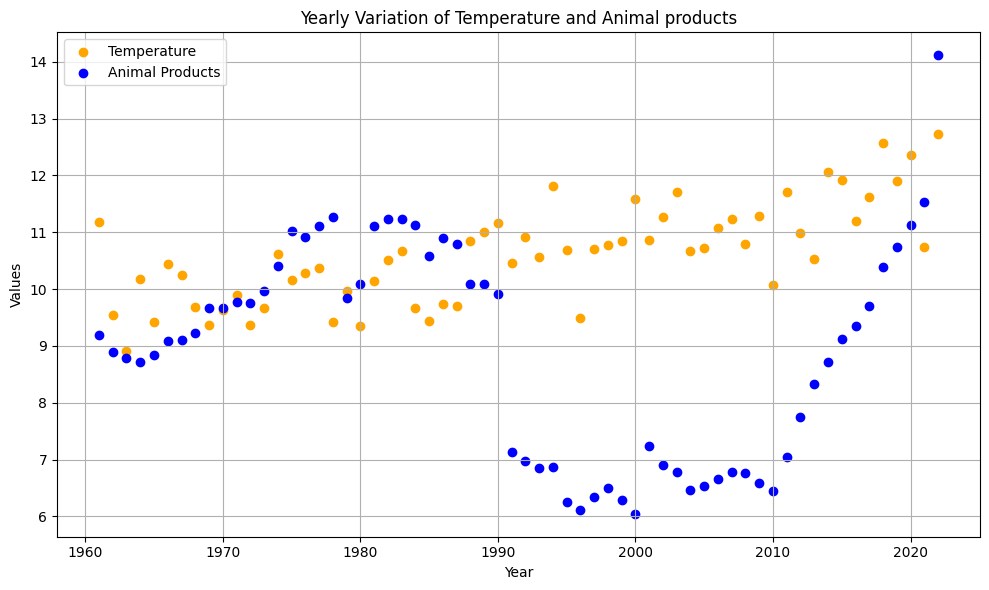

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped['Year'], grouped['Temperature'], color='orange', label='Temperature ')
plt.scatter(grouped['Year'], grouped['Scaled_Value'], color='blue', label='Animal Products')

plt.title('Yearly Variation of Temperature and Animal products')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


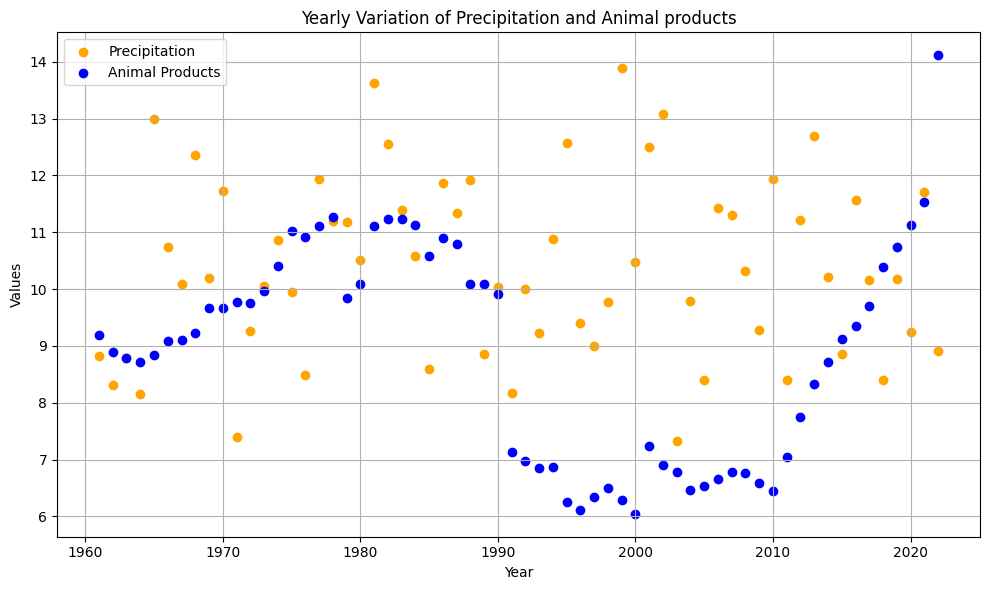

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped['Year'], grouped['Precipitation'], color='orange', label='Precipitation')
plt.scatter(grouped['Year'], grouped['Scaled_Value'], color='blue', label='Animal Products')

plt.title('Yearly Variation of Precipitation and Animal products')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


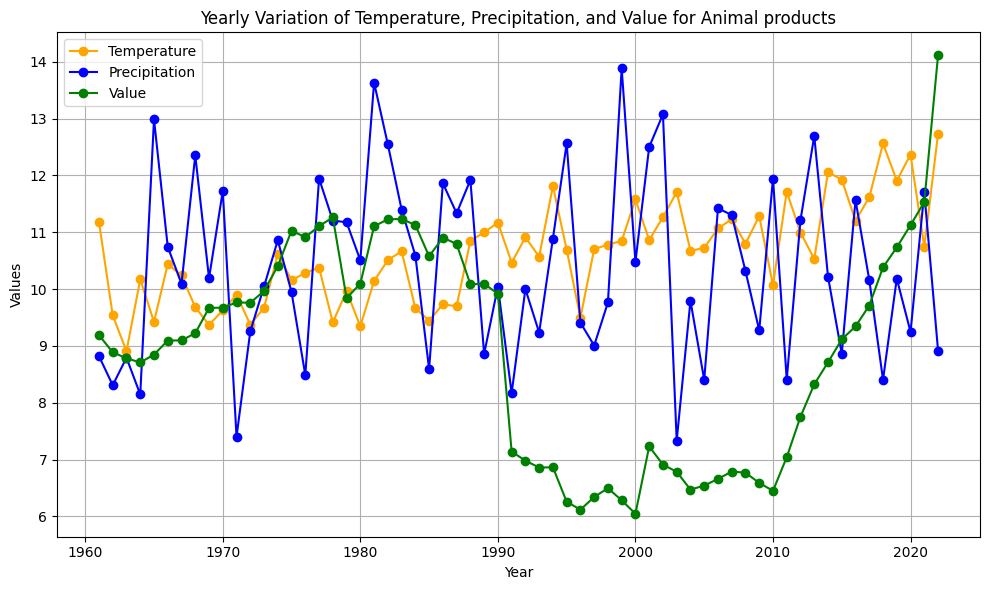

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data=grouped
# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Temperature'], marker='o', linestyle='-', color='orange', label='Temperature')
plt.plot(data['Year'], data['Precipitation'], marker='o', linestyle='-', color='blue', label='Precipitation')
plt.plot(data['Year'], data['Scaled_Value'], marker='o', linestyle='-', color='green', label='Value')

plt.title('Yearly Variation of Temperature, Precipitation, and Value for Animal products')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


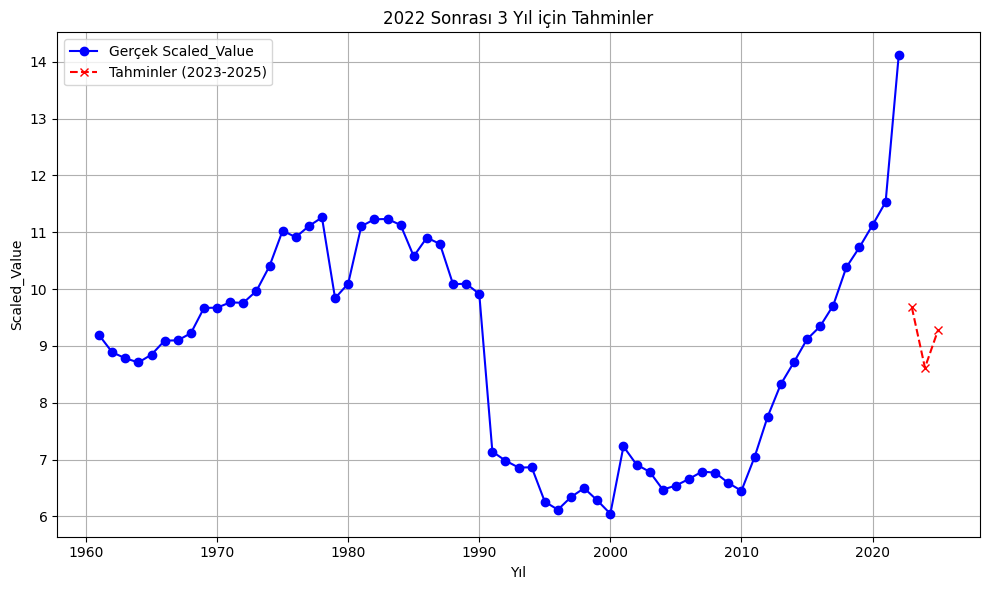

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Yıl, sıcaklık, yağış ve Scaled_Value sütunlarını kullanarak veri kümesini oluştur
data = grouped[['Year', 'Temperature', 'Precipitation', 'Scaled_Value']].values

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :3])  # İlk 3 sütun: Yıl, Sıcaklık, Yağış
        y.append(values[i + n_steps, 3])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data_scaled, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=0)

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_data = input_data[-n_steps:, :3].reshape((1, n_steps, 3))  # İlk 3 sütunu kullan
    for _ in range(future_steps):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[0, 0, yhat[0, 0]]])  # Yeni tahmini ekle
        input_data = np.append(input_data[:, 1:, :], new_input.reshape(1, 1, 3), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = 3
future_years = np.arange(2023, 2023 + future_steps)
scaled_predictions = forecast(model, data_scaled, n_steps, future_steps)

# Ölçeklendirilmiş tahminleri orijinal ölçeğe dönüştürme
predictions = scaler.inverse_transform(np.column_stack((np.zeros((len(scaled_predictions), 3)), scaled_predictions)))[:, 3]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2025)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2022 Sonrası 3 Yıl için Tahminler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


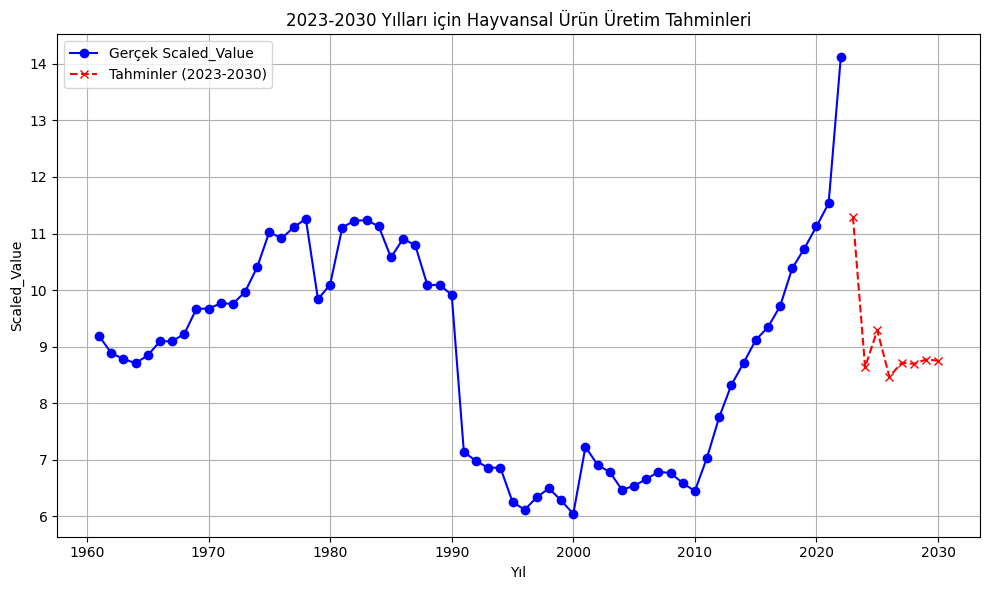

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Yıl, sıcaklık, yağış ve Scaled_Value sütunlarını kullanarak veri kümesini oluştur
data = grouped[['Year', 'Temperature', 'Precipitation', 'Scaled_Value']].values

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :3])  # İlk 3 sütun: Yıl, Sıcaklık, Yağış
        y.append(values[i + n_steps, 3])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data_scaled, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=0)

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_data = input_data[-n_steps:, :3].reshape((1, n_steps, 3))  # İlk 3 sütunu kullan
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[0, 0, yhat[0, 0]]])  # Yeni tahmini ekle
        input_data = np.append(input_data[:, 1:, :], new_input.reshape(1, 1, 3), axis=1)
    return predictions
future steps=8
# Gelecek yıllar için tahminler (2023-2031)

future_years = np.arange(2023, 2031)
scaled_predictions = forecast(model, data_scaled, n_steps, future_steps)

# Ölçeklendirilmiş tahminleri orijinal ölçeğe dönüştürme
predictions = scaler.inverse_transform(np.column_stack((np.zeros((len(scaled_predictions), 3)), scaled_predictions)))[:, 3]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped['Year'], grouped['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2030)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2030 Yılları için Hayvansal Ürün Üretim Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 15ms/step - loss: 0.1935
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1780
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1631
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1488
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1347
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1210
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1072
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0917
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0740
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0583
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0437
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0367
Epoch 13/200
2/2 [==============================] - 0s 8ms/s

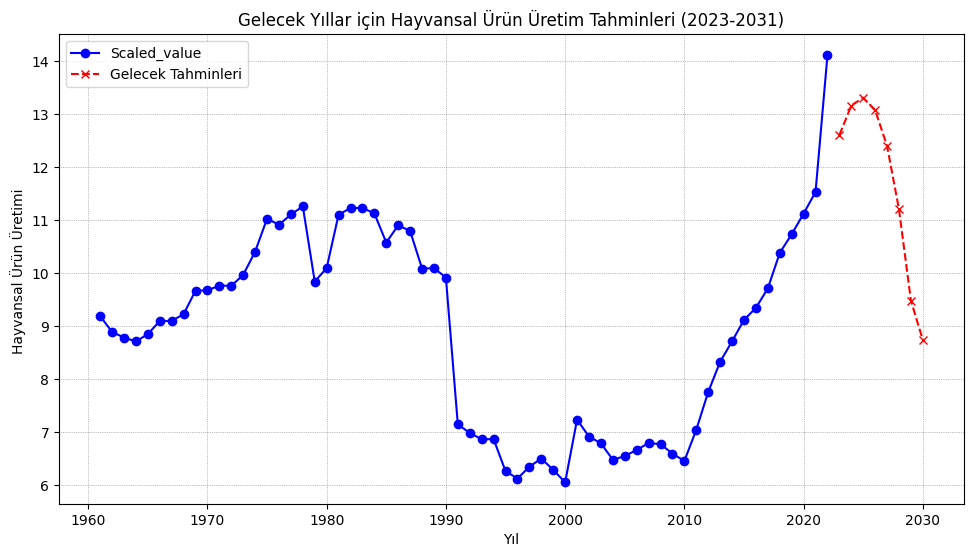

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 7  
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2031)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Hayvansal Ürün Üretim Tahminleri (2023-2031)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Hayvansal Ürün Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 8ms/step - loss: 0.1704
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1519
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1347
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1168
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1004
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0824
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0657
Epoch 8/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0515
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0384
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0417
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0451
Epoch 13/200
2/2 [==============================] - 0s 8ms

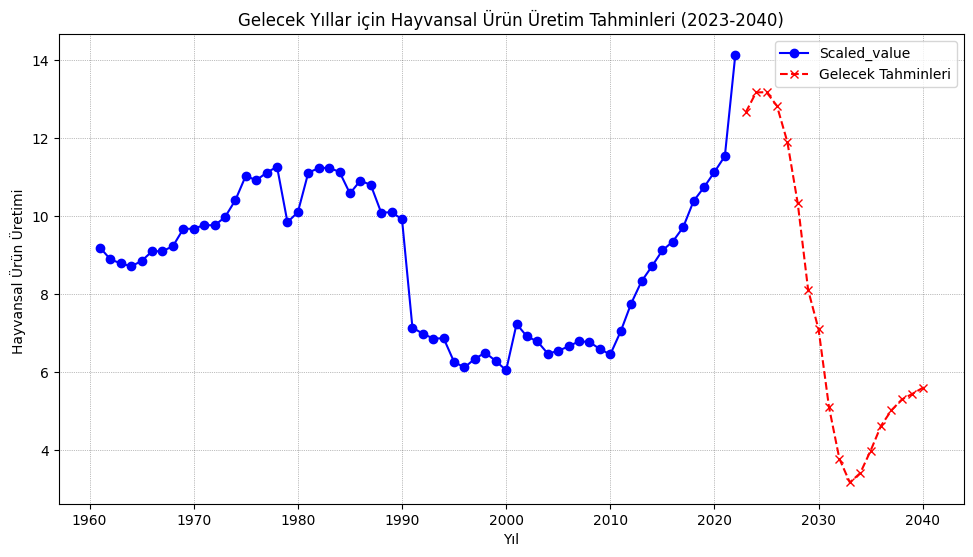

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 7  
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2041)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Hayvansal Ürün Üretim Tahminleri (2023-2040)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Hayvansal Ürün Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


In [5]:
import pandas as pd
df2=pd.read_csv('meyve_sebze.csv')
df2 = df2.drop(columns=['Unnamed: 0'])


df2

,Year,Value,avg_temp,water_metric,Product Group
0,1961,2000.00,11.181358,8.819635,Fruits and Vegetables
1,1962,2200.00,9.536632,8.308219,Fruits and Vegetables
2,1963,2800.00,8.908176,8.792237,Fruits and Vegetables
3,1964,1100.00,10.170688,8.145492,Fruits and Vegetables
4,1965,945.00,9.422461,12.989726,Fruits and Vegetables
...,...,...,...,...,...
4001,2017,24861.79,11.616636,10.160959,Fruits and Vegetables
4002,2018,23618.62,12.562935,8.404110,Fruits and Vegetables
4003,2019,26627.00,11.908582,10.184932,Fruits and Vegetables
4004,2020,307311.64,12.367193,9.245219,Fruits and Vegetables


In [6]:
grouped2 = df2.groupby(['Year'])['Value'].mean().reset_index()
grouped2['Scaled_Value'] = grouped2['Value'].apply(lambda x: float('{:.0f}'.format(x)))/200000

grouped2['Temperature']=df2['avg_temp']
grouped2['Precipitation']=df2['water_metric']
grouped2


,Year,Value,Scaled_Value,Temperature,Precipitation
0,1961,2.668700e+05,1.334350,11.181358,8.819635
1,1962,2.649052e+05,1.324525,9.536632,8.308219
2,1963,2.767211e+05,1.383605,8.908176,8.792237
3,1964,3.162725e+05,1.581365,10.170688,8.145492
4,1965,2.992235e+05,1.496115,9.422461,12.989726
...,...,...,...,...,...
57,2018,1.174544e+06,5.872720,12.562935,8.404110
58,2019,1.210122e+06,6.050610,11.908582,10.184932
59,2020,1.316527e+06,6.582635,12.367193,9.245219
60,2021,1.269434e+06,6.347170,10.741261,11.702055


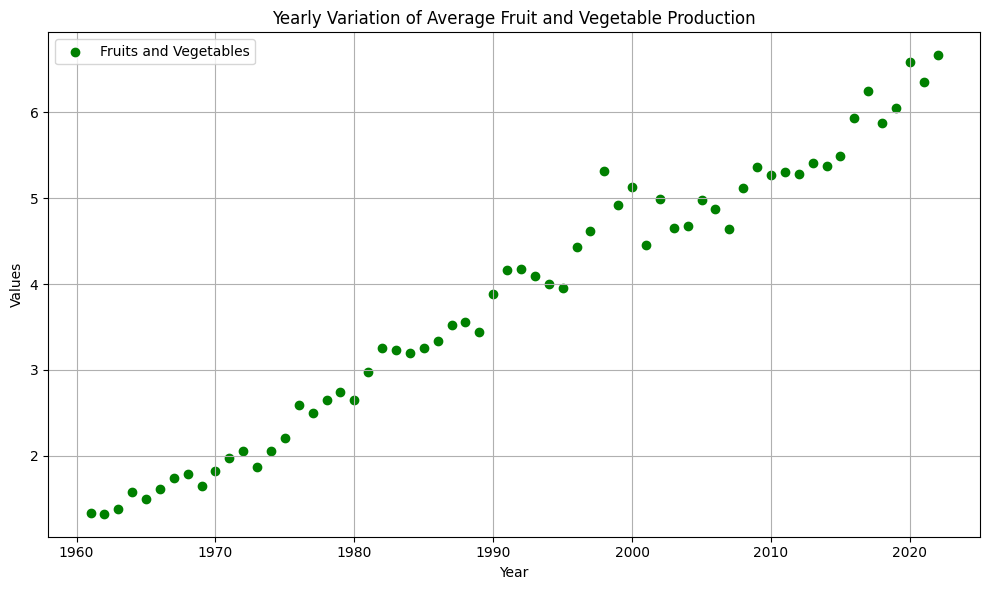

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped2['Year'], grouped2['Scaled_Value'], color='green', label='Fruits and Vegetables')

plt.title('Yearly Variation of Average Fruit and Vegetable Production' )
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


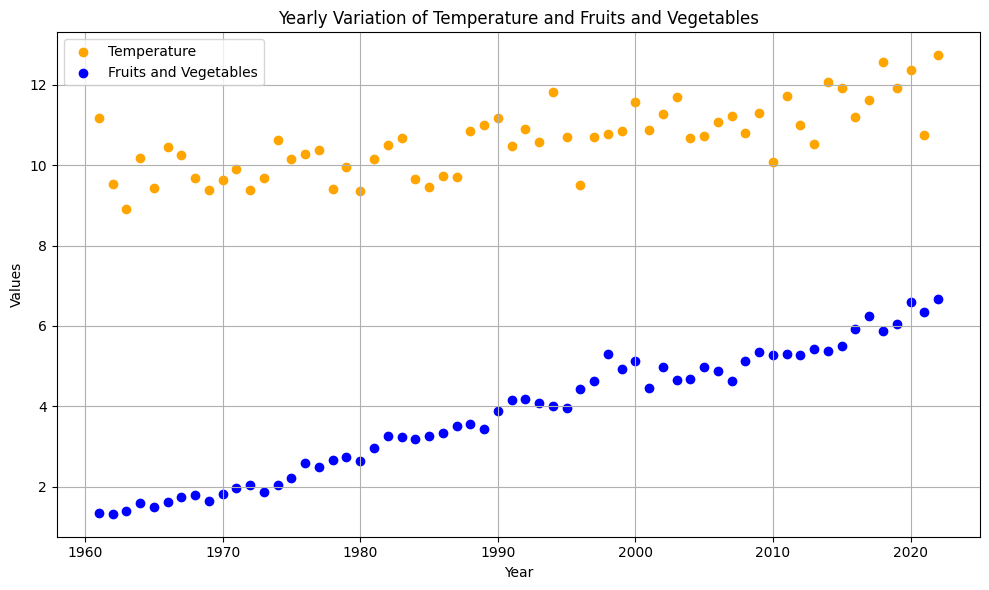

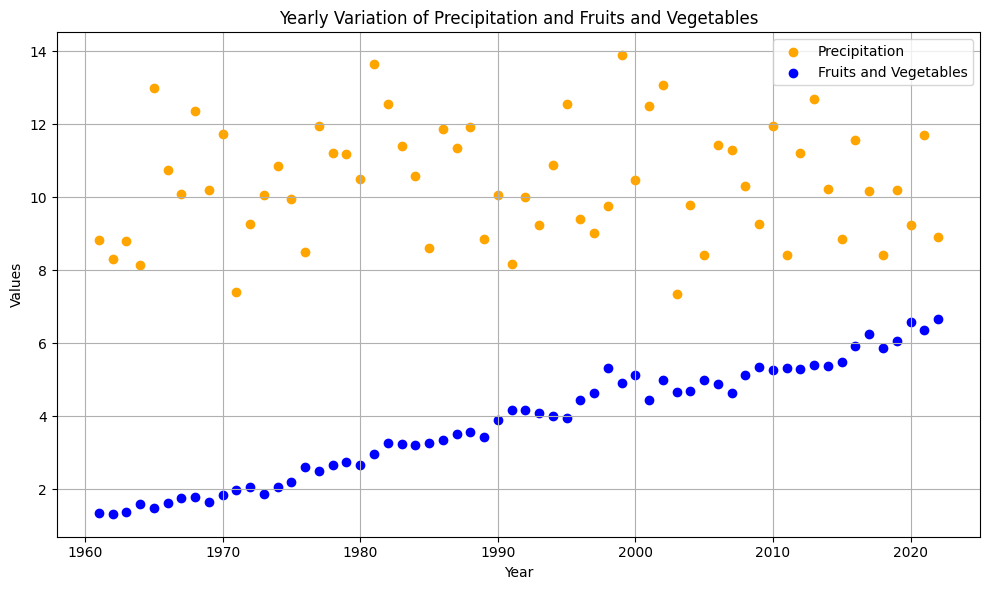

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped2['Year'], grouped2['Temperature'], color='orange', label='Temperature ')
plt.scatter(grouped2['Year'], grouped2['Scaled_Value'], color='blue', label='Fruits and Vegetables')

plt.title('Yearly Variation of Temperature and Fruits and Vegetables')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped2['Year'], grouped2['Precipitation'], color='orange', label='Precipitation')
plt.scatter(grouped2['Year'], grouped2['Scaled_Value'], color='blue', label='Fruits and Vegetables')

plt.title('Yearly Variation of Precipitation and Fruits and Vegetables')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



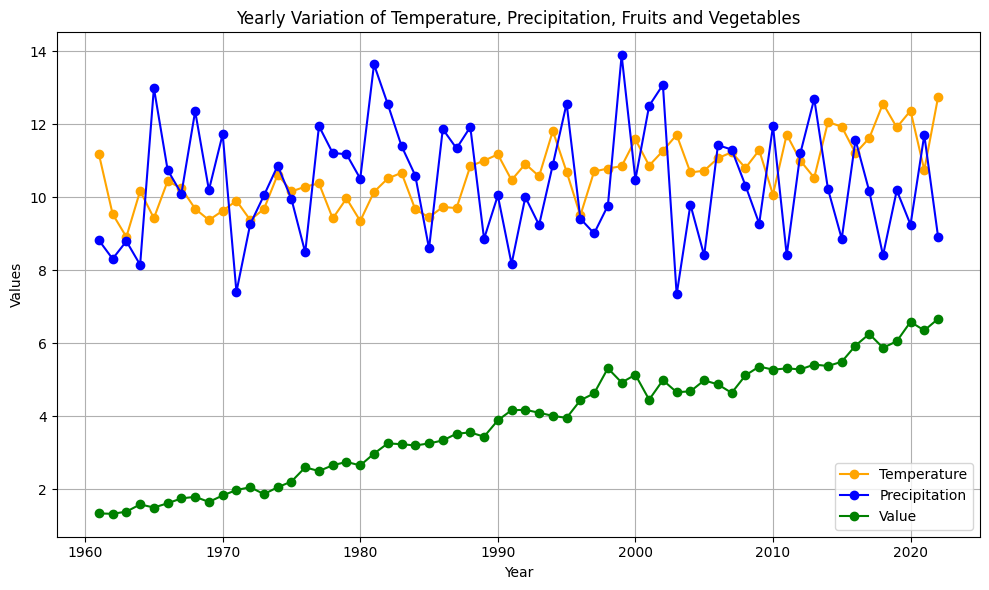

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
data=grouped2
# Grafik çizimi
plt.figure(figsize=(10, 6))
data=grouped2
plt.plot(data['Year'], data['Temperature'], marker='o', linestyle='-', color='orange', label='Temperature')
plt.plot(data['Year'], data['Precipitation'], marker='o', linestyle='-', color='blue', label='Precipitation')
plt.plot(data['Year'], data['Scaled_Value'], marker='o', linestyle='-', color='green', label='Value')

plt.title('Yearly Variation of Temperature, Precipitation, Fruits and Vegetables')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 251ms/step - loss: 19.3941 - val_loss: 14.6598 - lr: 0.0010
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 17.5519 - val_loss: 13.2145 - lr: 0.0010
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 15.8535 - val_loss: 11.5717 - lr: 0.0010
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 14.3782 - val_loss: 9.6366 - lr: 0.0010
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 11.5811 - val_loss: 7.3327 - lr: 0.0010
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 9.0880 - val_loss: 4.6726 - lr: 0.0010
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 6.0637 - val_loss: 2.2757 - lr: 0.0010
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 3.3826 - val_loss: 1.7405 - lr: 0.0010
Epoch 9/200
2/2 [==============================] - 0s 27ms/step - loss: 3.7645 - val_loss: 3.1885 - lr:

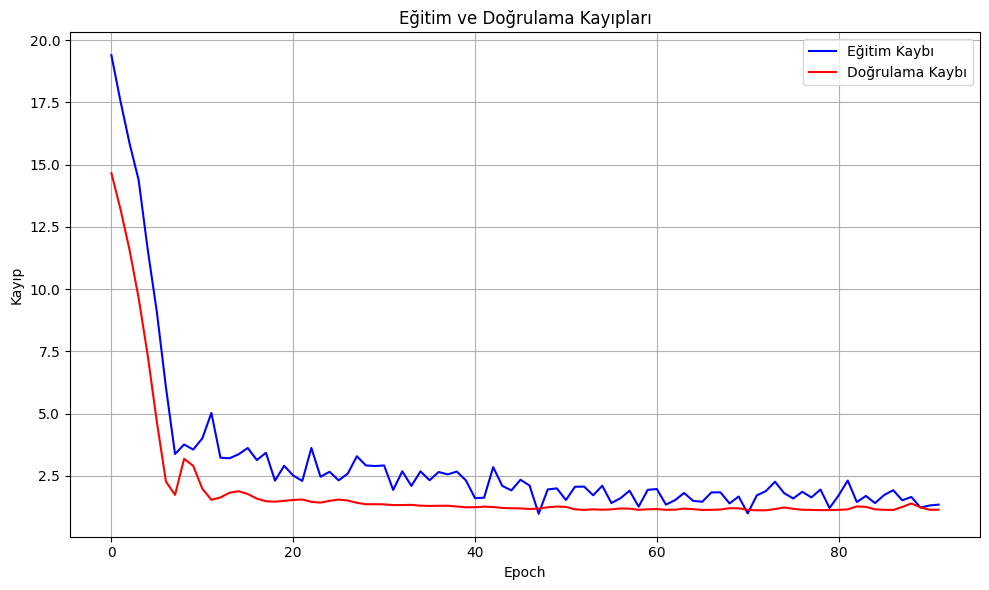

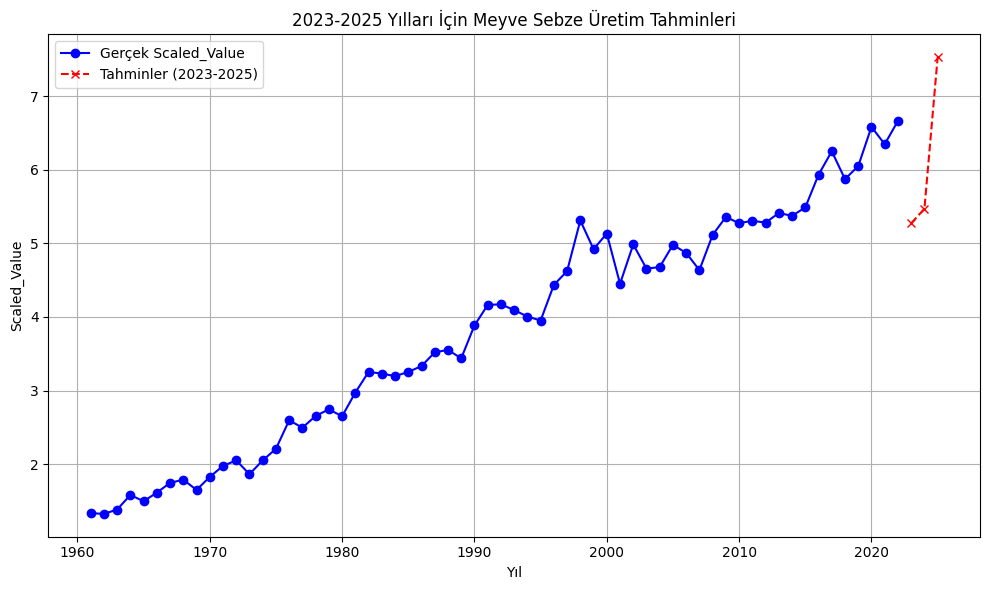

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split



# Veri kümesini oluşturma
data2 = grouped2[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data2, n_steps)

# Veriyi eğitim ve doğrulama setlerine bölme
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# EarlyStopping ve ReduceLROnPlateau callback'lerini oluşturma
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

# Modeli eğitme
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Eğitim ve doğrulama kayıplarının grafiği
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='b')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='r')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = 3
future_years = np.arange(2023, 2023 + future_steps)
predictions = forecast(model, data2, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped2['Year'], grouped2['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2025)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2025 Yılları İçin Meyve Sebze Üretim Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 8ms/step - loss: 0.3193
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.3009
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2842
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2650
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2466
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2260
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2062
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1829
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1575
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1309
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1034
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0738
Epoch 13/200
2/2 [==============================] - 0s 8ms/st

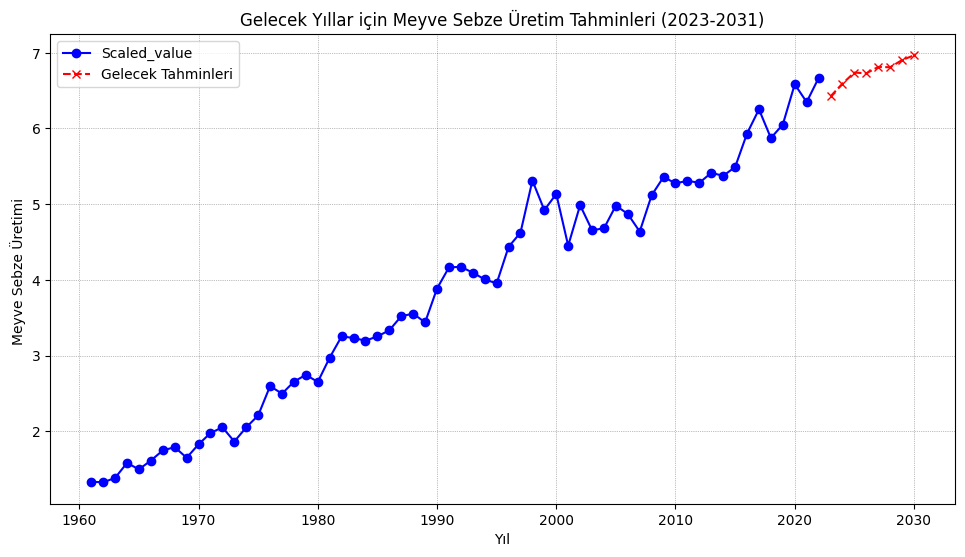

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped2['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2031)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped2['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Meyve Sebze Üretim Tahminleri (2023-2031)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Meyve Sebze Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 8ms/step - loss: 0.3085
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2849
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.2618
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2404
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2158
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1917
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1652
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1376
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1083
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0804
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0518
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 13/200
2/2 [==============================] - 0s 8ms/

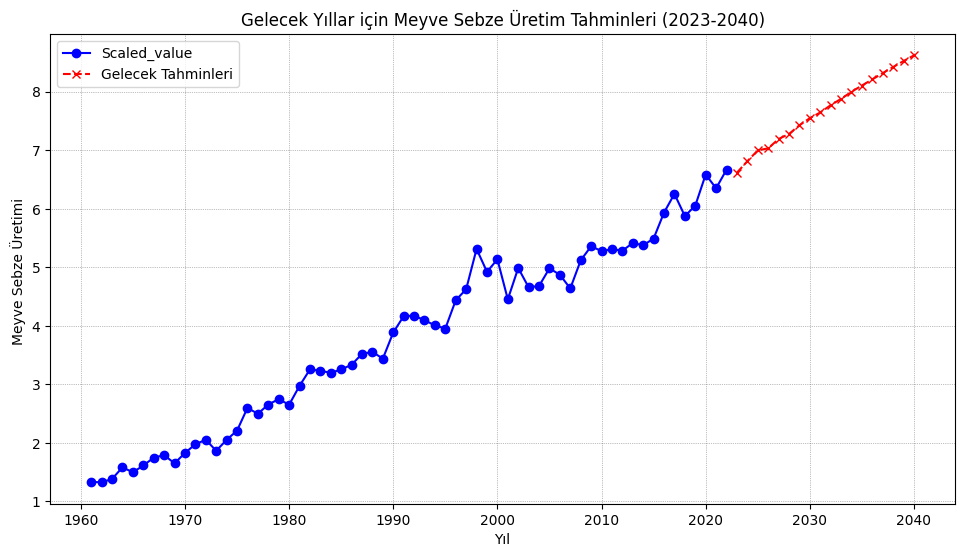

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped2['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2041)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped2['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Meyve Sebze Üretim Tahminleri (2023-2040)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Meyve Sebze Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


In [40]:
import pandas as pd
tohum=pd.read_csv('bakla_tohum.csv')
tohum = tohum.drop(columns=['Unnamed: 0'])
tohum

,Year,Value,avg_temp,water_metric,Product Group
0,1961,27400.0,11.181358,8.819635,Cereals and Legumes
1,1962,24400.0,9.536632,8.308219,Cereals and Legumes
2,1963,20330.0,8.908176,8.792237,Cereals and Legumes
3,1964,25000.0,10.170688,8.145492,Cereals and Legumes
4,1965,20300.0,9.422461,12.989726,Cereals and Legumes
...,...,...,...,...,...
3135,2018,20000000.0,12.562935,8.404110,Cereals and Legumes
3136,2019,19000000.0,11.908582,10.184932,Cereals and Legumes
3137,2020,20500000.0,12.367193,9.245219,Cereals and Legumes
3138,2021,17650000.0,10.741261,11.702055,Cereals and Legumes


In [41]:
grouped3 = tohum.groupby(['Year'])['Value'].mean().reset_index()
grouped3['Scaled_Value'] = grouped3['Value'].apply(lambda x: float('{:.0f}'.format(x)))/200000

grouped3['Temperature']=tohum['avg_temp']
grouped3['Precipitation']=tohum['water_metric']
grouped3


,Year,Value,Scaled_Value,Temperature,Precipitation
0,1961,2.845603e+05,1.422800,11.181358,8.819635
1,1962,3.235415e+05,1.617705,9.536632,8.308219
2,1963,3.803872e+05,1.901935,8.908176,8.792237
3,1964,3.261540e+05,1.630770,10.170688,8.145492
4,1965,3.278017e+05,1.639010,9.422461,12.989726
...,...,...,...,...,...
57,2018,8.555639e+05,4.277820,12.562935,8.404110
58,2019,8.779299e+05,4.389650,11.908582,10.184932
59,2020,9.346198e+05,4.673100,12.367193,9.245219
60,2021,8.303967e+05,4.151985,10.741261,11.702055


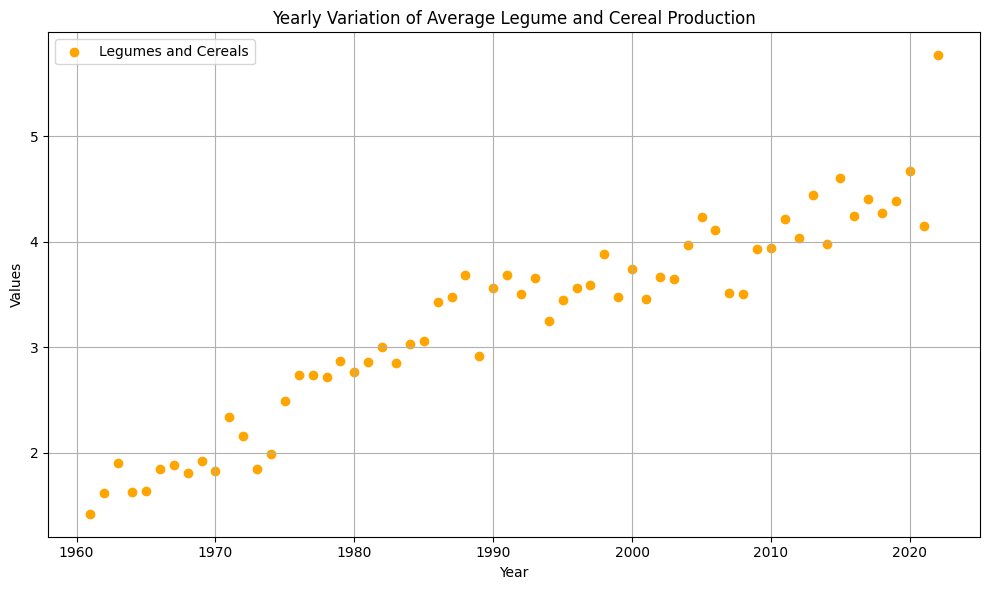

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped3['Year'], grouped3['Scaled_Value'], color='orange', label='Legumes and Cereals')

plt.title('Yearly Variation of Average Legume and Cereal Production' )
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


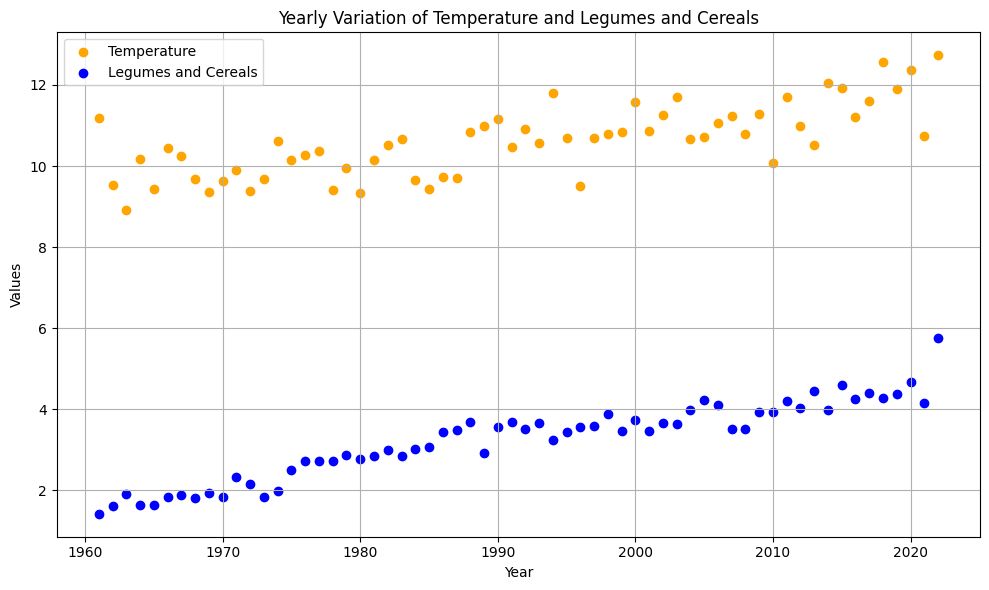

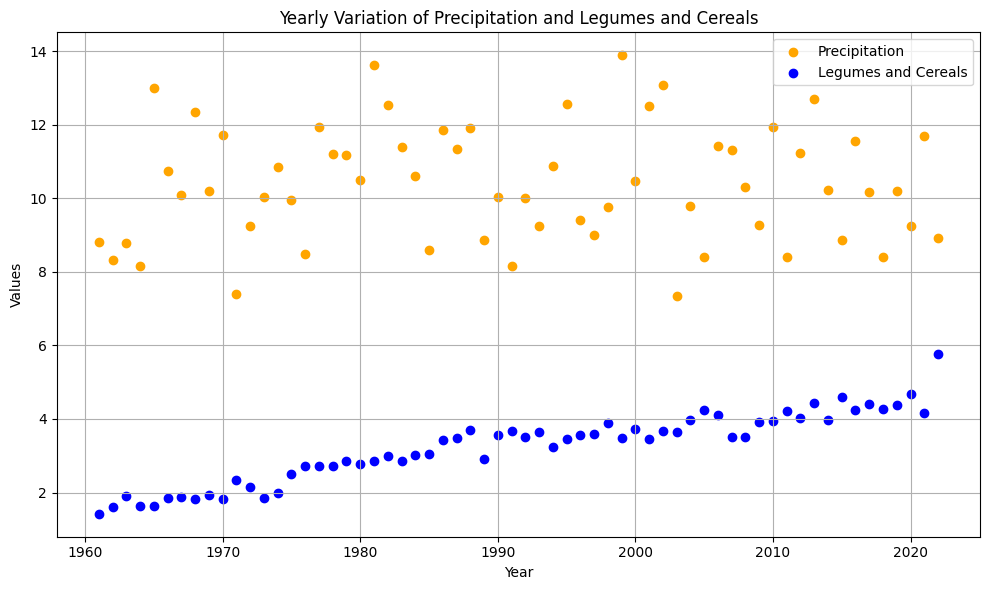

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped3['Year'], grouped3['Temperature'], color='orange', label='Temperature ')
plt.scatter(grouped3['Year'], grouped3['Scaled_Value'], color='blue', label='Legumes and Cereals')

plt.title('Yearly Variation of Temperature and Legumes and Cereals')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped3['Year'], grouped3['Precipitation'], color='orange', label='Precipitation')
plt.scatter(grouped3['Year'], grouped3['Scaled_Value'], color='blue', label='Legumes and Cereals')

plt.title('Yearly Variation of Precipitation and Legumes and Cereals')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



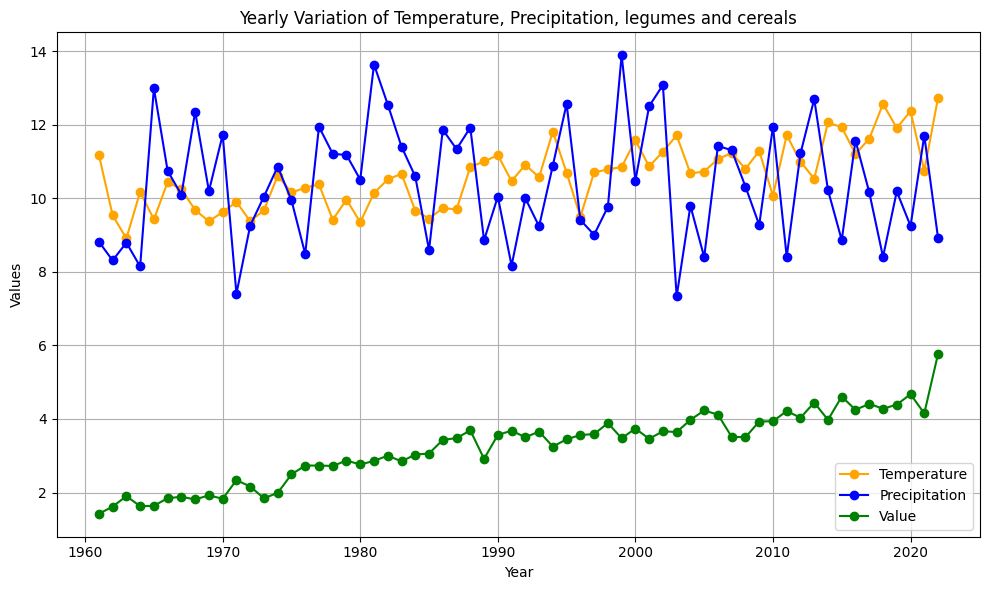

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data=grouped3
# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.plot(data['Year'], data['Temperature'], marker='o', linestyle='-', color='orange', label='Temperature')
plt.plot(data['Year'], data['Precipitation'], marker='o', linestyle='-', color='blue', label='Precipitation')
plt.plot(data['Year'], data['Scaled_Value'], marker='o', linestyle='-', color='green', label='Value')

plt.title('Yearly Variation of Temperature, Precipitation, legumes and cereals')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 4ms/step - loss: 8.1752
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 6.7274
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 5.9757
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 3.9999
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 2.5606
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 1.2950
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.9622
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 1.5207
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 2.2571
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 1.5087
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 1.3604
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0840
Epoch 13/200
2/2 [==============================] - 0s 12ms/s

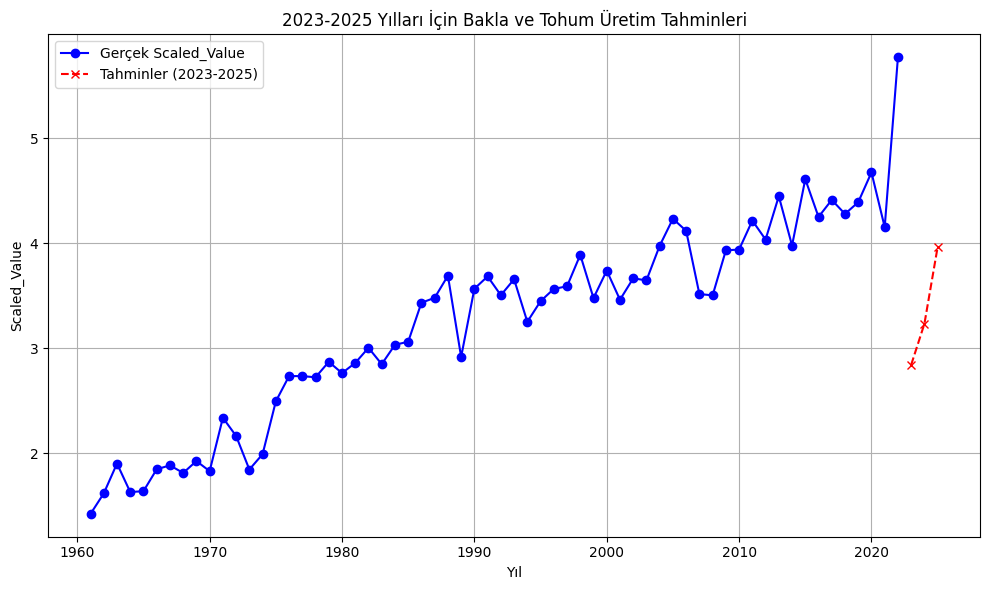

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data3 = grouped3[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data3, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = 3
future_years = np.arange(2023, 2023 + future_steps)
predictions = forecast(model, data3, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped3['Year'], grouped3['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2025)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2025 Yılları İçin Bakla ve Tohum Üretim Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 10ms/step - loss: 0.2394
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2219
Epoch 3/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2058
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1919
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1789
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1640
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1494
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1327
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1143
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0947
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0740
Epoch 12/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 13/200
2/2 [==============================] - 0s 8ms/

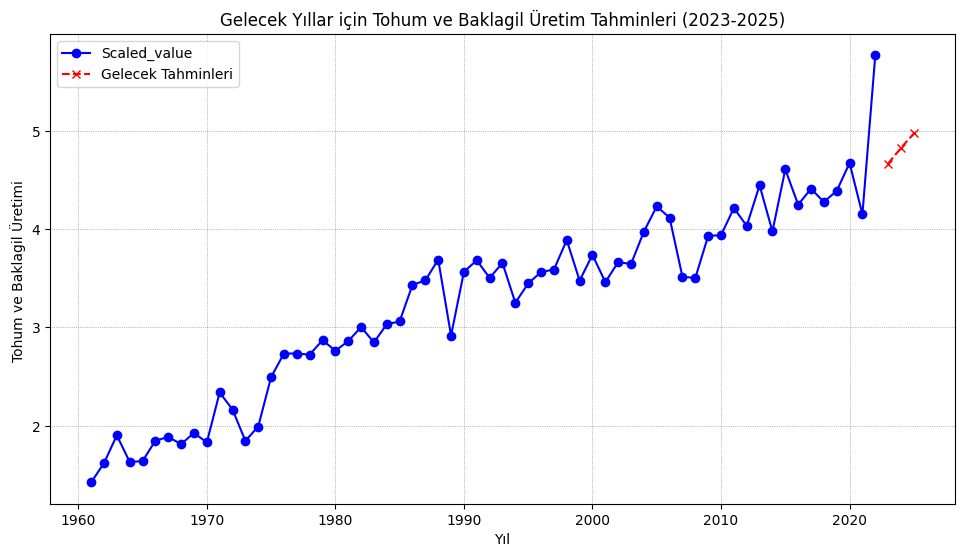

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped3['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2026)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped2['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Tohum ve Baklagil Üretim Tahminleri (2023-2025)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Tohum ve Baklagil Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 9ms/step - loss: 0.2523
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2379
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2252
Epoch 4/200
2/2 [==============================] - 0s 18ms/step - loss: 0.2134
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2018
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1899
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1771
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1634
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1475
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1318
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1139
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0955
Epoch 13/200
2/2 [==============================] - 0s 10m

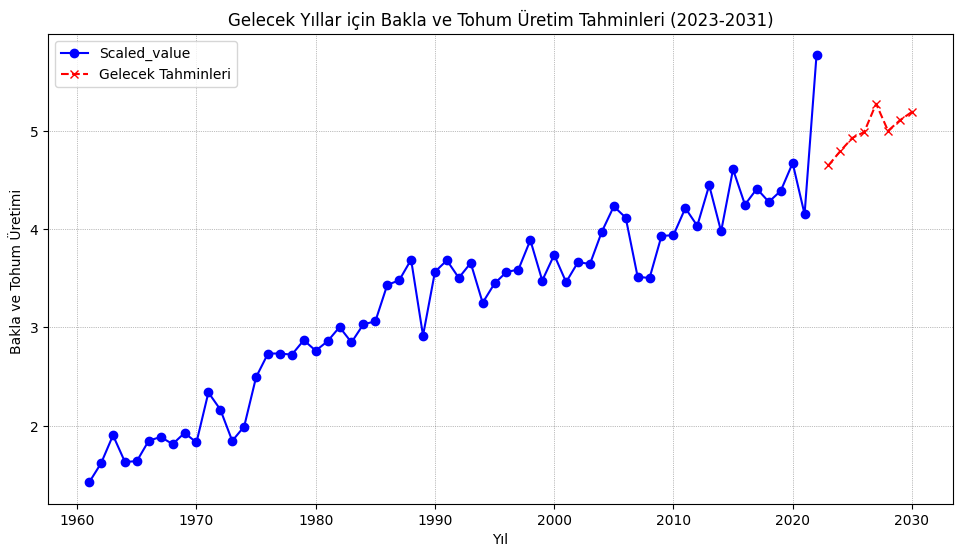

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped3['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2031)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped3['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Bakla ve Tohum Üretim Tahminleri (2023-2031)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Bakla ve Tohum Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 1s 4ms/step - loss: 12.2018
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 11.7204
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 11.3240
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 10.8957
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 10.4589
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 9.9872
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 9.4685
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 8.6280
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 7.7396
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 6.6372
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 5.0225
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 3.1830
Epoch 13/200
2/2 [==============================] - 0s 6

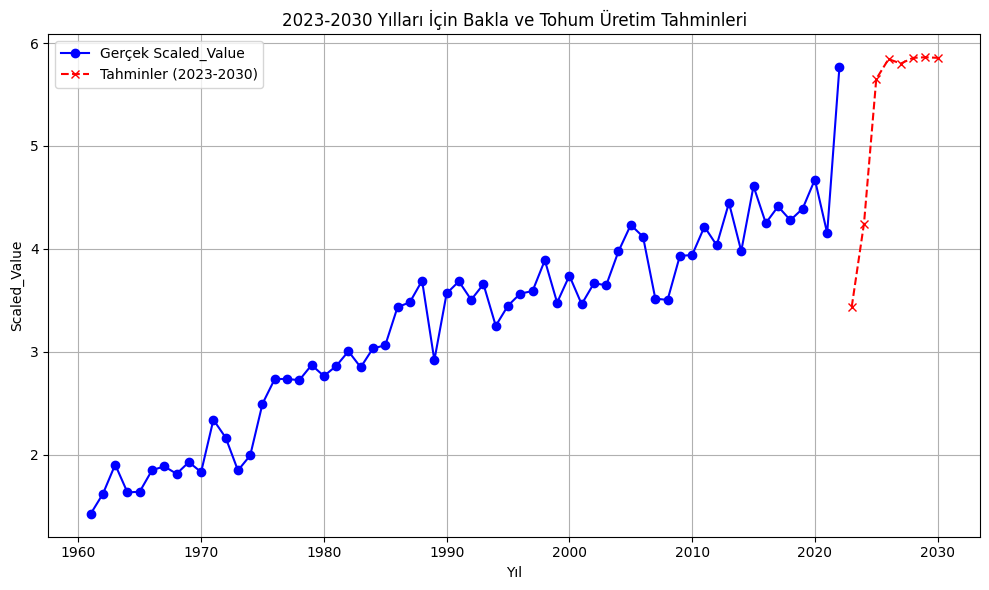

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data3 = grouped3[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data3, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = len(future_years)
future_years = np.arange(2023, 2031)
predictions = forecast(model, data3, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped3['Year'], grouped3['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2030)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2030 Yılları İçin Bakla ve Tohum Üretim Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 5ms/step - loss: 12.8091
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 11.8599
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 10.7523
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 9.7248
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 8.9077
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 7.3866
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 6.0574
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 4.5678
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 2.9530
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 1.7245
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 1.1506
Epoch 12/200
2/2 [==============================] - 0s 6ms/step - loss: 2.0611
Epoch 13/200
2/2 [==============================] - 0s 5ms

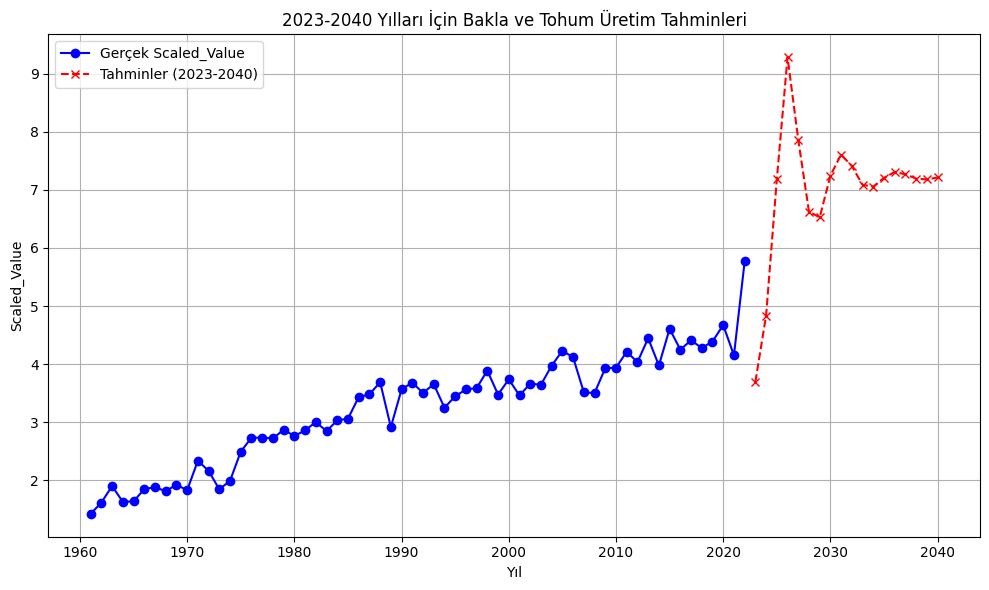

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data3 = grouped3[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data3, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = len(future_years)
future_years = np.arange(2023, 2041)
predictions = forecast(model, data3, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped3['Year'], grouped3['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2040)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2040 Yılları İçin Bakla ve Tohum Üretim Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 8ms/step - loss: 0.2414
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2306
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2219
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2135
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2042
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1951
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1843
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1725
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1592
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1448
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1302
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1128
Epoch 13/200
2/2 [==============================] - 0s 9m

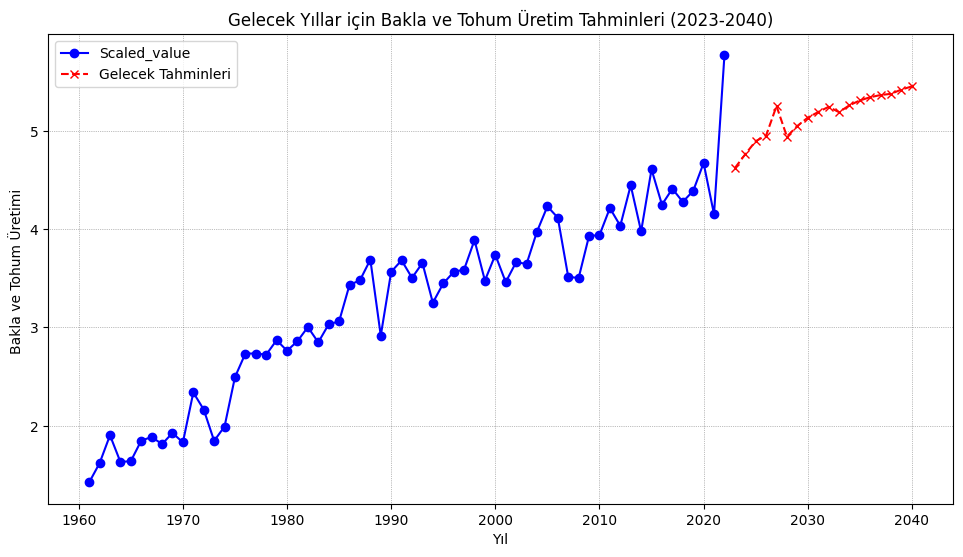

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped3['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2041)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped3['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Bakla ve Tohum Üretim Tahminleri (2023-2040)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Bakla ve Tohum Üretimi ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


In [54]:
sanayi=pd.read_csv('sanayi_kumas.csv')
sanayi = sanayi.drop(columns=['Unnamed: 0'])

sanayi

,Year,Value,avg_temp,water_metric,Product Group
0,1961,949.0,11.181358,8.819635,cotton_silk_like
1,1962,907.0,9.536632,8.308219,cotton_silk_like
2,1963,970.0,8.908176,8.792237,cotton_silk_like
3,1964,955.0,10.170688,8.145492,cotton_silk_like
4,1965,1144.0,9.422461,12.989726,cotton_silk_like
...,...,...,...,...,...
365,2018,94.0,12.562935,8.404110,cotton_silk_like
366,2019,90.0,11.908582,10.184932,cotton_silk_like
367,2020,90.0,12.367193,9.245219,cotton_silk_like
368,2021,76.0,10.741261,11.702055,cotton_silk_like


In [55]:
grouped4 = sanayi.groupby(['Year'])['Value'].mean().reset_index()
grouped4['Scaled_Value'] = grouped4['Value'].apply(lambda x: float('{:.0f}'.format(x)))/200000

grouped4['Temperature']=sanayi['avg_temp']
grouped4['Precipitation']=sanayi['water_metric']
grouped4


,Year,Value,Scaled_Value,Temperature,Precipitation
0,1961,142425.500000,0.712130,11.181358,8.819635
1,1962,161492.333333,0.807460,9.536632,8.308219
2,1963,167518.833333,0.837595,8.908176,8.792237
3,1964,209888.333333,1.049440,10.170688,8.145492
4,1965,209258.166667,1.046290,9.422461,12.989726
...,...,...,...,...,...
57,2018,602947.623333,3.014740,12.562935,8.404110
58,2019,514775.500000,2.573880,11.908582,10.184932
59,2020,418918.500000,2.094590,12.367193,9.245219
60,2021,528710.500000,2.643550,10.741261,11.702055


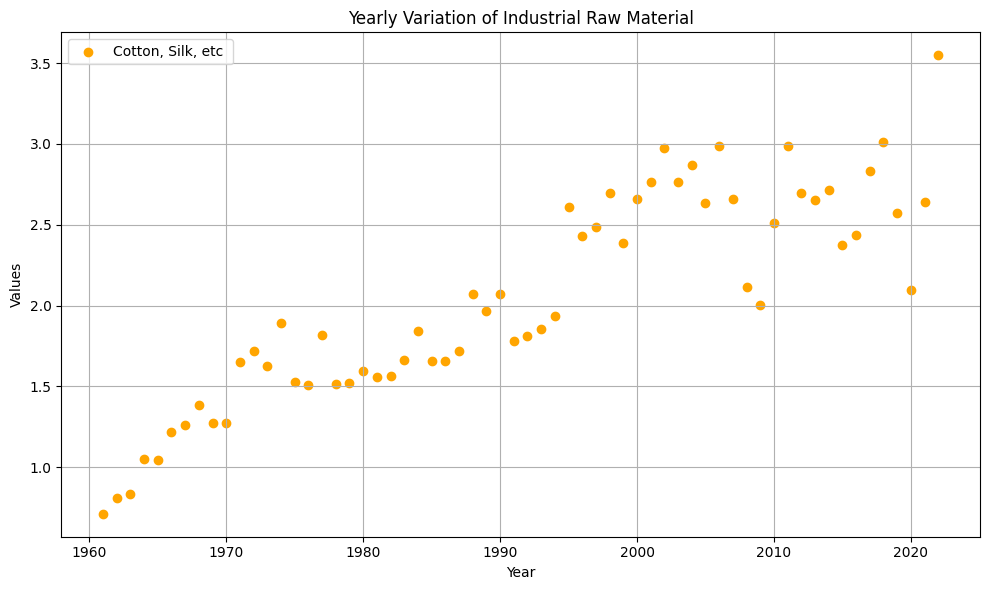

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped4['Year'], grouped4['Scaled_Value'], color='orange', label='Cotton, Silk, etc ')

plt.title('Yearly Variation of Industrial Raw Material')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


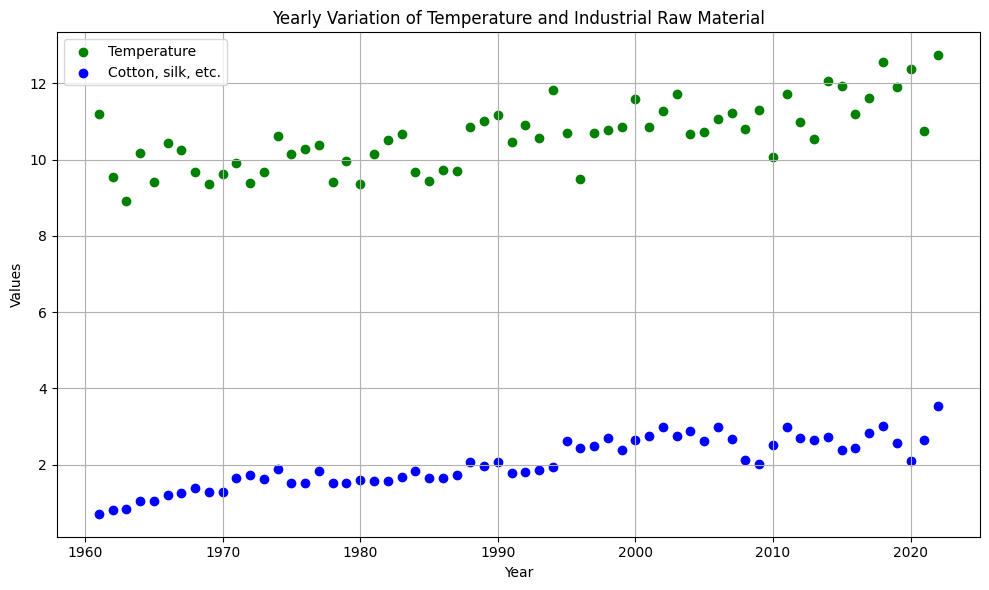

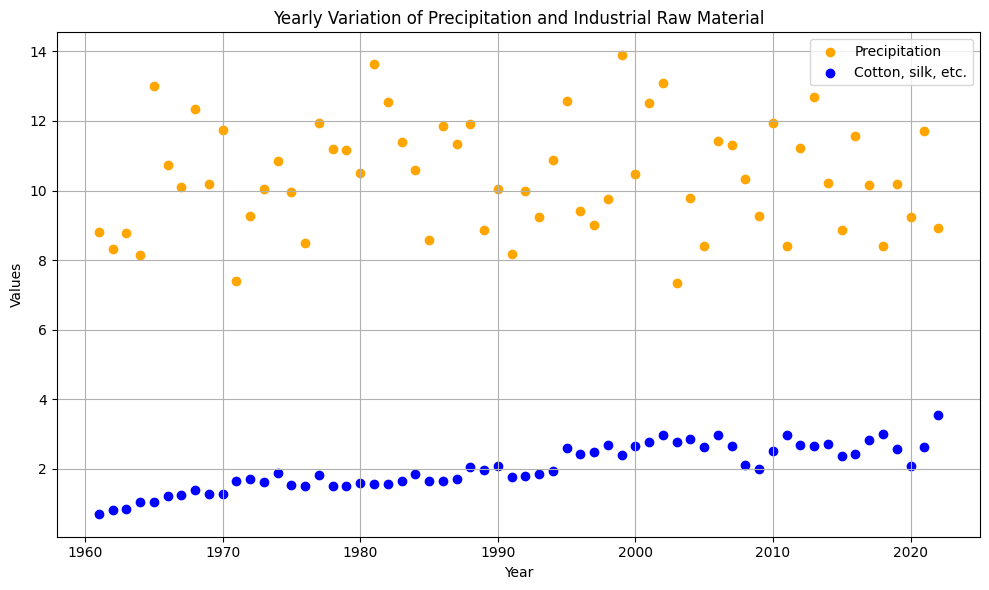

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped4['Year'], grouped4['Temperature'], color='green', label='Temperature ')
plt.scatter(grouped4['Year'], grouped4['Scaled_Value'], color='blue', label='Cotton, silk, etc.')

plt.title('Yearly Variation of Temperature and Industrial Raw Material')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Grafik çizimi
plt.figure(figsize=(10, 6))

plt.scatter(grouped4['Year'], grouped4['Precipitation'], color='orange', label='Precipitation')
plt.scatter(grouped4['Year'], grouped4['Scaled_Value'], color='blue', label='Cotton, silk, etc.')

plt.title('Yearly Variation of Precipitation and Industrial Raw Material')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



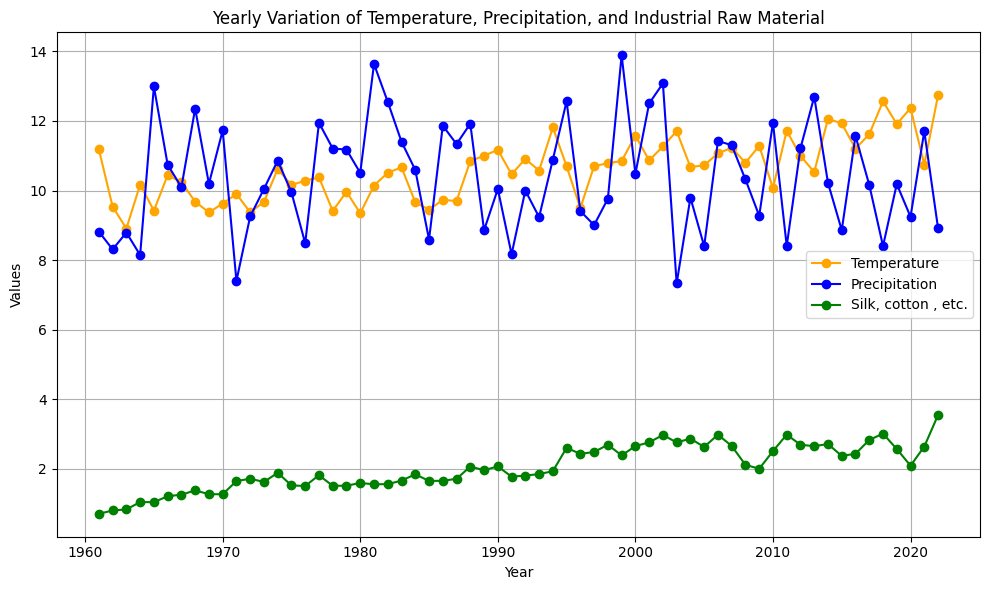

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(grouped4['Year'], grouped4['Temperature'], marker='o', linestyle='-', color='orange', label='Temperature')
plt.plot(grouped4['Year'], grouped4['Precipitation'], marker='o', linestyle='-', color='blue', label='Precipitation')
plt.plot(grouped4['Year'], grouped4['Scaled_Value'], marker='o', linestyle='-', color='green', label='Silk, cotton , etc.')

plt.title('Yearly Variation of Temperature, Precipitation, and Industrial Raw Material')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 7ms/step - loss: 5.4491
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 5.1202
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 4.7442
Epoch 4/200
2/2 [==============================] - 0s 4ms/step - loss: 4.4731
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 4.2007
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 4.0202
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7457
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 3.4897
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 3.1295
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 2.6300
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 2.2515
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 1.5895
Epoch 13/200
2/2 [==============================] - 0s 4ms/st

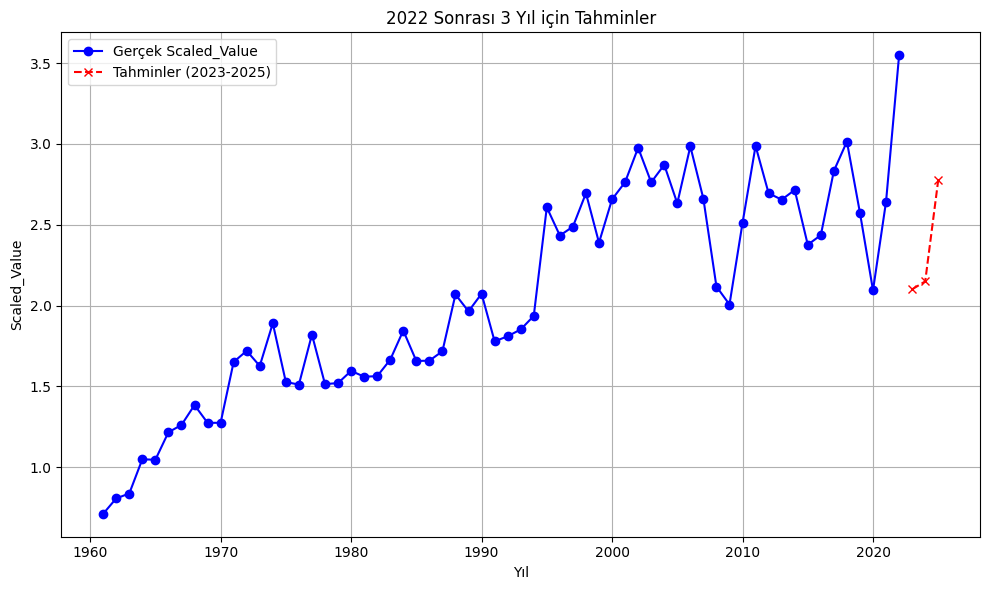

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data = grouped4[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2025)
future_steps = 3
future_years = np.arange(2023, 2023 + future_steps)
predictions = forecast(model, data, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped4['Year'], grouped4['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2025)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2022 Sonrası 3 Yıl için Tahminler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 5ms/step - loss: 4.3665
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 3.6474
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 2.9265
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 2.5957
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 1.7374
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 1.1617
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6605
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6140
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7522
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9973
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7192
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5850
Epoch 13/200
2/2 [==============================] - 0s 5ms/st

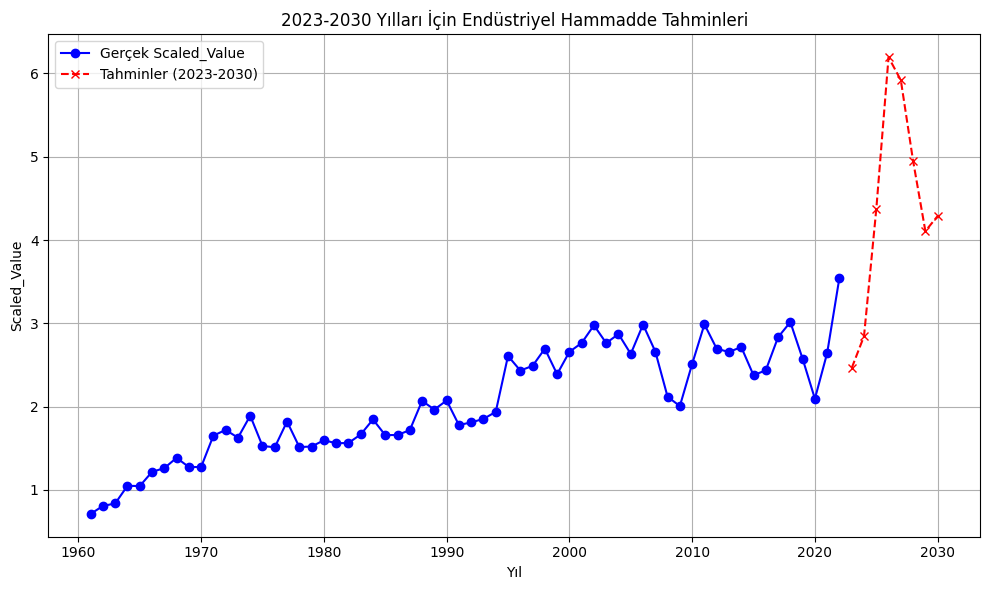

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data4 = grouped4[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data4, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2031)
future_steps = len(future_years)
future_years = np.arange(2023, 2031)
predictions = forecast(model, data3, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped4['Year'], grouped4['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2030)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2030 Yılları İçin Endüstriyel Hammadde Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 8ms/step - loss: 0.2885
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2671
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2463
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2258
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2047
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1844
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1596
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1362
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 0.1104
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0848
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0587
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0361
Epoch 13/200
2/2 [==============================] - 0s 8ms/s

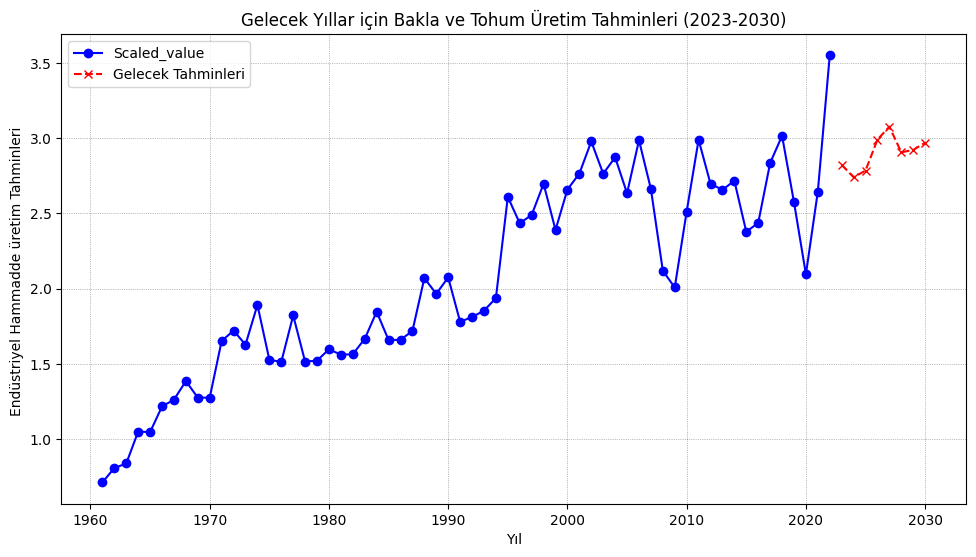

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped4['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2031)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped3['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Bakla ve Tohum Üretim Tahminleri (2023-2030)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Endüstriyel Hammadde üretim Tahminleri ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 10ms/step - loss: 0.2943
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2773
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2609
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2442
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2297
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2143
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1984
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1817
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1633
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1427
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.1202
Epoch 12/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0971
Epoch 13/200
2/2 [==============================] - 0s 8ms/

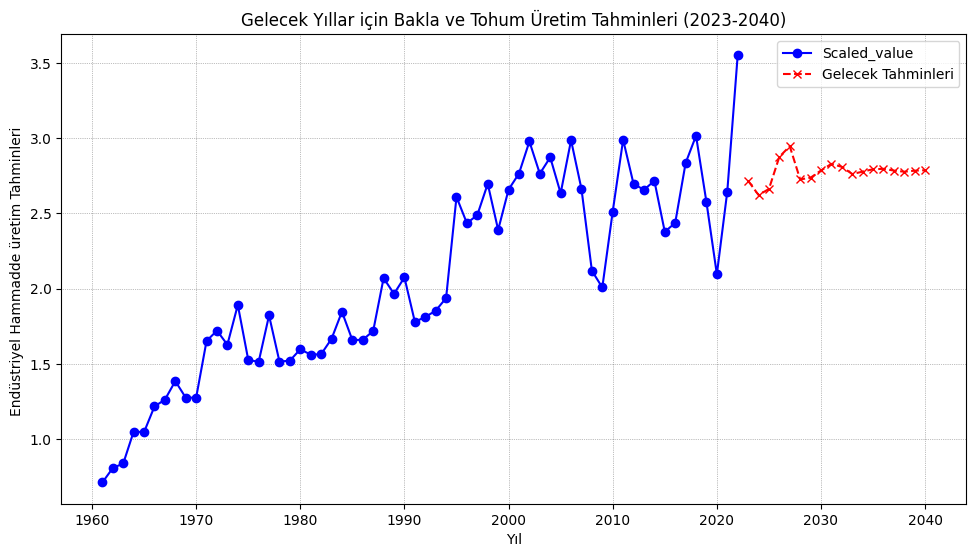

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
temperature_data = scaler.fit_transform(grouped4['Scaled_Value'].values.reshape(-1, 1))

# LSTM modeli için veri hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps])
        y.append(values[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 5 
X, y = prepare_data(temperature_data, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LeakyReLU(alpha=0.002))
    model.add(Dropout(0.001))
    model.add(LSTM(50))
    model.add(LeakyReLU(alpha=0.003))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], 1))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stopping])

# Gelecek yıllar için tahmin yapma
def forecast(model, input_data, n_steps, future_years):
    predictions = []
    input_data = input_data[-n_steps:].reshape((1, n_steps, 1))
    for _ in range(len(future_years)):
        yhat = model.predict(input_data, verbose=0)
        predictions.append(yhat[0, 0])
        input_data = np.append(input_data[:, 1:, :], yhat).reshape((1, n_steps, 1))
    return predictions

future_years = np.arange(2023, 2041)
input_data = temperature_data
scaled_predictions = forecast(model, input_data, n_steps, future_years)
predictions = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# Tahminleri gösterme
print(f'Future Predictions: {dict(zip(future_years, predictions))}')

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Orjinal veriyi çizme
ax.plot(grouped3['Year'], scaler.inverse_transform(temperature_data), marker='o', linestyle='-', color='b', label='Scaled_value')

# Gelecek tahminlerini çizme
ax.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Gelecek Tahminleri')

# Grafik başlık ve etiketleri
ax.set_title('Gelecek Yıllar için Bakla ve Tohum Üretim Tahminleri (2023-2040)')
ax.set_xlabel('Yıl')
ax.set_ylabel('Endüstriyel Hammadde üretim Tahminleri ')
ax.legend()

# Grid ayarları
ax.grid(True, which='both', axis='both', linestyle=':', linewidth=0.5, color='black', alpha=0.5)

# Sıkıştırma ve sol üst köşeye hizalama
plt.tight_layout()
plt.subplots_adjust(left=0.08, top=0.88)
plt.show()


Epoch 1/200
2/2 [==============================] - 2s 5ms/step - loss: 4.5697
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 4.2414
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 3.8191
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 3.3782
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 2.7881
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 2.1892
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 1.4211
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9281
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.4437
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6356
Epoch 11/200
2/2 [==============================] - 0s 6ms/step - loss: 0.8751
Epoch 12/200
2/2 [==============================] - 0s 7ms/step - loss: 0.7017
Epoch 13/200
2/2 [==============================] - 0s 6ms/st

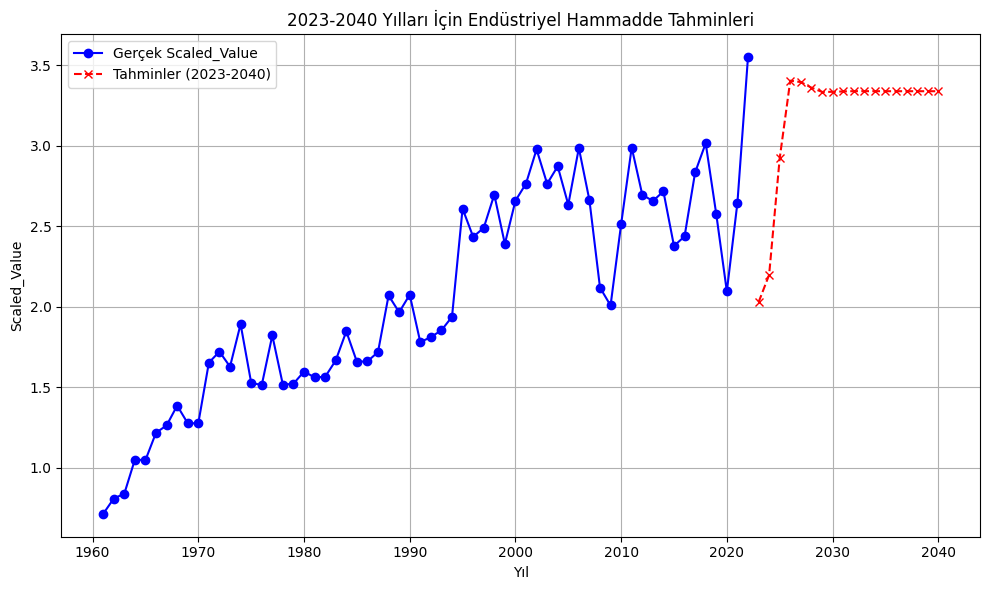

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Veri kümesini oluşturma
data4 = grouped4[['Temperature', 'Precipitation', 'Scaled_Value']].values

# LSTM modeli için veriyi hazırlama fonksiyonu
def prepare_data(values, n_steps):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i + n_steps, :2])  # Sıcaklık ve Yağış sütunları
        y.append(values[i + n_steps, 2])     # Hedef: Scaled_Value
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data4, n_steps)

# LSTM modelini oluşturma
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Veriyi LSTM giriş formatına uygun hale getirme
X_train = X.reshape((X.shape[0], X.shape[1], X.shape[2]))
y_train = y

# Modeli oluşturma ve eğitme
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=200, verbose=1)

# Gelecek yıllar için tahmin yapma fonksiyonu
def forecast(model, input_data, n_steps, future_steps):
    predictions = []
    input_seq = input_data[-n_steps:, :2].reshape((1, n_steps, 2))  # Sıcaklık ve Yağış sütunlarını kullan
    for _ in range(future_steps):
        yhat = model.predict(input_seq, verbose=0)
        predictions.append(yhat[0, 0])
        new_input = np.array([[input_data[-1, 0] + 1, yhat[0, 0]]])  # Yeni tahmini ekle
        input_seq = np.append(input_seq[:, 1:, :], new_input.reshape(1, 1, 2), axis=1)
    return predictions

# Gelecek yıllar için tahminler (2023-2041)
future_steps = len(future_years)
future_years = np.arange(2023, 2041)
predictions = forecast(model, data3, n_steps, future_steps)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(grouped4['Year'], grouped4['Scaled_Value'], marker='o', linestyle='-', label='Gerçek Scaled_Value', color='b')
plt.plot(future_years, predictions, marker='x', linestyle='--', label='Tahminler (2023-2040)', color='r')
plt.xlabel('Yıl')
plt.ylabel('Scaled_Value')
plt.title('2023-2040 Yılları İçin Endüstriyel Hammadde Tahminleri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
